# Discrete Box-Constrained Minimax Classifer for Uncertain and Imbalanced Class Proportions

#### References for these algorithms:
Article [1]: *Discrete Box-Constrained Minimax Classifier for Uncertain and Imbalanced Class Proportions.* Cyprien Gilet, Susana Barbosa, Lionel Fillatre, IEEE TRANSACTIONS ON PATTERN ANALYSIS AND MACHINE INTELLIGENCE, 2020.

Article [2]: *Adjusting Decision Trees for Uncertain Class Proportions.* Cyprien Gilet, Marie Guyomard, Susana Barbosa, Lionel Fillatre, ECML/PKDD Workshop on Uncertainty in Machine Learning (WUML), 2020.

The authors sincerely thank Marie Guyomard for her contributions and her precious help in this project.

## Toy example on a synthetic database containing K=3 classes

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import random
import seaborn as sn
import time

np.random.seed(407)

Call the notebook "DMC_functions.ipynb" containing all the functions:

In [2]:
run DMC_functions.ipynb

### Database generation
We consider here the synthetic database presented in Appendix A.2 on the paper [1].

##### Number of classes $K$ and Loss function $L$:

In [3]:
K = 3
L = np.ones((K,K)) - np.eye(K)

##### Generation of the training dataset:
XTrain corresponds to the features,
YRTrain corresponds to the real labels, and piTrain corresponds to the class proportions associated with the training set.

In [4]:
X, y = datasets.make_blobs(n_samples=[8000,1500,500], n_features=2, centers=[(9.5, 10), (10, 12), (11.7, 7.6)], cluster_std=[[1,1.5], [1.1,1.2], 0.8], shuffle=True, random_state=None)

X1 = []
X2 = []
for i in range(len(X)):
    X1.append(X[i][0])
    X2.append(X[i][1])

df = pd.DataFrame({'X1':X1, 'X2':X2, 'y':y+1})

# 
XTrain = df.copy()
XTrain.drop(['y'], axis='columns', inplace=True)
YRTrain = df[['y']]

# Class proportions of the training set:
piTrain = compute_pi(K, YRTrain)

Scatter plot of the training dataset and pie plot of the class proportions:

Text(0.5, 1.0, 'Class proportions of the Training set')

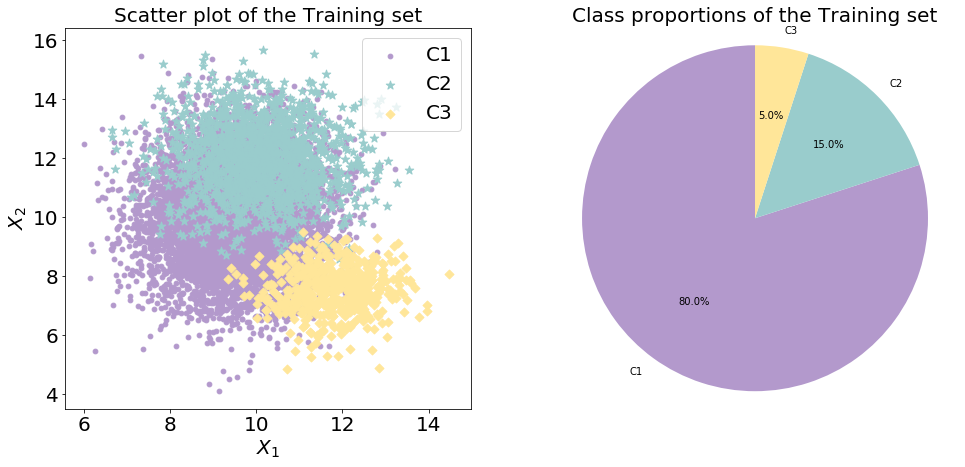

In [5]:
figScatter = plt.figure(figsize=(16,7))

# Scatter plot of the training set:
ax1 = figScatter.add_subplot(1,2,1)
ax1.scatter(XTrain.loc[(np.where(YRTrain[['y']]==1)[0]).tolist(),'X1'], XTrain.loc[(np.where(YRTrain[['y']]==1)[0]).tolist(),'X2'], color=(0.7, 0.6, 0.8), marker='.', label='C1',s=90)
ax1.scatter(XTrain.loc[(np.where(YRTrain[['y']]==2)[0]).tolist(),'X1'], XTrain.loc[(np.where(YRTrain[['y']]==2)[0]).tolist(),'X2'], color=(0.6, 0.8, 0.8), marker='*', label='C2',s=80)
ax1.scatter(XTrain.loc[(np.where(YRTrain[['y']]==3)[0]).tolist(),'X1'], XTrain.loc[(np.where(YRTrain[['y']]==3)[0]).tolist(),'X2'], color=(1, 0.9, 0.6), marker='D', s=40, label='C3')
ax1.legend(fontsize=20, loc='upper right')
ax1.set_xlabel("$X_1$",fontsize=20)
ax1.set_ylabel("$X_2$",fontsize=20)
ax1.set_title("Scatter plot of the Training set",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# Pie plot of the class proportions associated with the training set:
ax2 = figScatter.add_subplot(1,2,2)
labels = ['C1', 'C2', 'C3']
colors = [(0.7, 0.6, 0.8),(0.6, 0.8, 0.8),(1, 0.9, 0.6)]
ax2.pie(piTrain[0], labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax2.axis('equal') 
ax2.set_title("Class proportions of the Training set",fontsize=20)

##### Generation of a test dataset following the same distributions
XTest corresponds to the features,
YRTest corresponds to the real labels, and piTest corresponds to the class proportions associated with the test set.

In [6]:
X, y = datasets.make_blobs(n_samples=[1600,300,100], n_features=2, centers=[(9.5, 10), (10, 12), (11.7, 7.6)], cluster_std=[[1,1.5], [1.1,1.2], 0.8], shuffle=True, random_state=None)

X1 = []
X2 = []
for i in range(len(X)):
    X1.append(X[i][0])
    X2.append(X[i][1])

df = pd.DataFrame({'X1':X1, 'X2':X2, 'y':y+1})

# 
XTest = df.copy()
XTest.drop(['y'], axis='columns', inplace=True)
YRTest = df[['y']]

# Class proportions of the training set:
piTest = compute_pi(K, YRTest)

Scatter plot of the test dataset and pie plot of the class proportions associated with the test set:

Text(0.5, 1.0, 'Class proportions of the Test set')

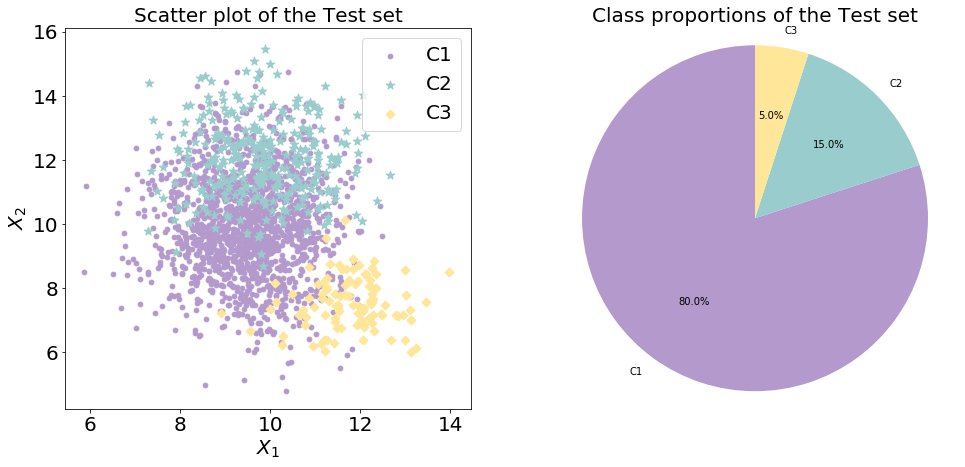

In [7]:
figScatter = plt.figure(figsize=(16,7))

# Scatter plot of the training set:
ax1 = figScatter.add_subplot(1,2,1)
ax1.scatter(XTest.loc[(np.where(YRTest[['y']]==1)[0]).tolist(),'X1'], XTest.loc[(np.where(YRTest[['y']]==1)[0]).tolist(),'X2'], color=(0.7, 0.6, 0.8), marker='.', label='C1',s=90)
ax1.scatter(XTest.loc[(np.where(YRTest[['y']]==2)[0]).tolist(),'X1'], XTest.loc[(np.where(YRTest[['y']]==2)[0]).tolist(),'X2'], color=(0.6, 0.8, 0.8), marker='*', label='C2',s=80)
ax1.scatter(XTest.loc[(np.where(YRTest[['y']]==3)[0]).tolist(),'X1'], XTest.loc[(np.where(YRTest[['y']]==3)[0]).tolist(),'X2'], color=(1, 0.9, 0.6), marker='D', s=40, label='C3')
ax1.legend(fontsize=20, loc='upper right')
ax1.set_xlabel("$X_1$",fontsize=20)
ax1.set_ylabel("$X_2$",fontsize=20)
ax1.set_title("Scatter plot of the Test set",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# Pie plot of the class proportions associated with the training set:
ax2 = figScatter.add_subplot(1,2,2)
labels = ['C1', 'C2', 'C3']
colors = [(0.7, 0.6, 0.8),(0.6, 0.8, 0.8),(1, 0.9, 0.6)]
ax2.pie(piTest[0], labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax2.axis('equal') 
ax2.set_title("Class proportions of the Test set",fontsize=20)

## Fit the Discrete Minimax Classifier (with Kmeans discretization of the features)

#### Fit the Discrete Minimax Classifier (without box-constraint on the priors)

Fit DMC ...
-> Fit the number of centroids:
---> Sub-cross-validation procedure: Processing fold f = 0
------> Processing number of centroids T = 3
------> Processing number of centroids T = 5
------> Processing number of centroids T = 9
------> Processing number of centroids T = 17
------> Processing number of centroids T = 29
------> Processing number of centroids T = 51
------> Processing number of centroids T = 91
------> Processing number of centroids T = 160
------> Processing number of centroids T = 283
------> Processing number of centroids T = 500
---> Sub-cross-validation procedure: Processing fold f = 1
------> Processing number of centroids T = 3
------> Processing number of centroids T = 5
------> Processing number of centroids T = 9
------> Processing number of centroids T = 17
------> Processing number of centroids T = 29
------> Processing number of centroids T = 51
------> Processing number of centroids T = 91
------> Processing number of centroids T = 160
------> Proc

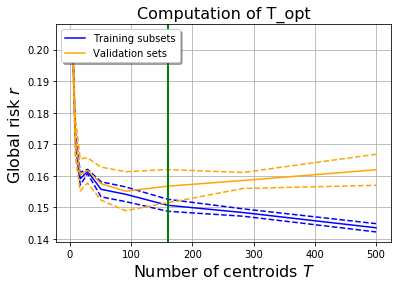

-> Optimal number of centroids T_opt (with respect to epsT) = 160.0
-> Compute the least favorable priors piStar


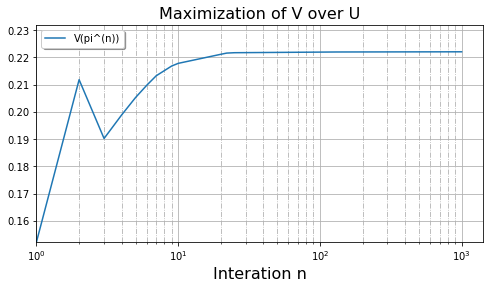

In [8]:
# PARAMETERS:
nbFoldsfitT = 4 #Number of iterations of the sub-cross-validation procedure on the training set for selecting the optimal number of centroids in order to achieve an acceptable generalization error.
T_max = 500 #Largest number of centroids to be tested at each fold of the sub-cross-validation procedure on the training set.
nbT = 10 #Number of number of centroids T to be tested at each fold of the sub-cross-validation procedure on the training set (a list containing nbT number of centroids will be generated between K and Tmax).
epsT = 0.007 #Maximum gap between the global risks of error of the training set and the generalization error.
N = 1000 #Number of iterations for the projected subgradient algorithm for computing piStar.
optionPlot = 1 #Allows to plot the convergence of the projected subgradient algorithm and the Fig. 2 on the paper regarding the choic of the optimal number of centroids.

# FIT DMC:
piBarDMC, pHatDMC, kmeansDMC, V_iterDMC, T_opt_DMC = fit_DMC(XTrain, YRTrain, K, L,'kmeans', [nbFoldsfitT, nbT, optionPlot, T_max], None, N, epsT, 'none')

Least favorable priors $\bar{\pi}$:

Text(0.5, 1.0, 'Least favorable priors piBar')

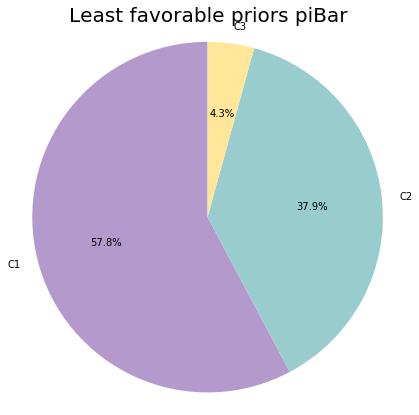

In [9]:
figScatter = plt.figure(figsize=(7,7))
# Pie plot of the class proportions associated with the training set:
ax2 = figScatter.add_subplot(1,1,1)
labels = ['C1', 'C2', 'C3']
colors = [(0.7, 0.6, 0.8),(0.6, 0.8, 0.8),(1, 0.9, 0.6)]
ax2.pie(piBarDMC[0], labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax2.axis('equal') 
ax2.set_title("Least favorable priors piBar",fontsize=20)

Evaluate the risks associated with the Discrete Minimax Classifier on the training set:

In [10]:
YhatTrainDMC = predict_DMC(XTrain, K, L,'kmeans', kmeansDMC, pHatDMC, piBarDMC)
R_DMC_Train, confmatTrainDMC = compute_conditional_risk(YRTrain, YhatTrainDMC, K, L)
r_DMC_Train = compute_global_risk(R_DMC_Train, piTrain)
psi_Train_DMC = np.max(R_DMC_Train[0])-np.min(R_DMC_Train[0])

print('Global risk on the training set:', r_DMC_Train)
print('Class-conditional risk on the training set:', R_DMC_Train[0])
print('psi(delta_DMC):', psi_Train_DMC)

Global risk on the training set: 0.2231
Class-conditional risk on the training set: [0.22425    0.21933333 0.216     ]
psi(delta_DMC): 0.008250000000000007


Prediction of the class labels associated with the test instances using the Discrete Minimax Classifier:

In [11]:
YhatTestDMC = predict_DMC(XTest, K, L,'kmeans', kmeansDMC, pHatDMC, piBarDMC)
R_DMC_Test, confmatTestDMC = compute_conditional_risk(YRTest, YhatTestDMC, K, L)
r_DMC_Test = compute_global_risk(R_DMC_Test, piTest)
psi_Test_DMC = np.max(R_DMC_Test[0])-np.min(R_DMC_Test[0])

print('Global risk on the test set:', r_DMC_Test)
print('Class-conditional risk on the test set:', R_DMC_Test[0])
print('psi(delta_DMC):', psi_Test_DMC)

Global risk on the test set: 0.23
Class-conditional risk on the test set: [0.224375 0.27     0.2     ]
psi(delta_DMC): 0.07


#### Fit the Discrete Box-Constrained Minimax Classifier (with box-constraint on the priors)

Generation of the box-constraint: Each row is associated with the constraints on each class. The first column represents the lower bound, the second column represents the upper bound. For this experiment, we consider the box-constraint
$$\mathbb{B} := \{\pi\in \mathbb{R}^3 : 0.6 \leq \pi_1 \leq 1, \;  0.1 \leq \pi_2 \leq 0.25, \; 0 \leq \pi_3 \leq 0.1\}.$$

In [12]:
Box = np.zeros((K,2))
# Class 1:
Box[0][0] = 0.6
Box[0][1] = 1
# Class 2:
Box[1][0] = 0.1
Box[1][1] = 0.25
# Class 3:
Box[2][0] = 0
Box[2][1] = 0.11

Compute the least favorable priors $\pi^{\star}$:

Fit DMC ...
-> Fit the number of centroids:
---> Sub-cross-validation procedure: Processing fold f = 0
------> Processing number of centroids T = 3
------> Processing number of centroids T = 5
------> Processing number of centroids T = 9
------> Processing number of centroids T = 17
------> Processing number of centroids T = 29
------> Processing number of centroids T = 51
------> Processing number of centroids T = 91
------> Processing number of centroids T = 160
------> Processing number of centroids T = 283
------> Processing number of centroids T = 500
---> Sub-cross-validation procedure: Processing fold f = 1
------> Processing number of centroids T = 3
------> Processing number of centroids T = 5
------> Processing number of centroids T = 9
------> Processing number of centroids T = 17
------> Processing number of centroids T = 29
------> Processing number of centroids T = 51
------> Processing number of centroids T = 91
------> Processing number of centroids T = 160
------> Proc

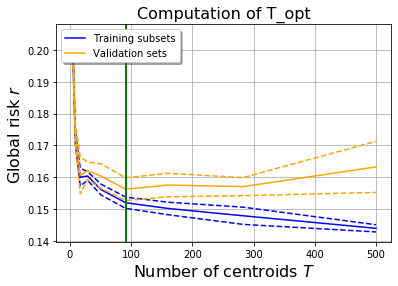

-> Optimal number of centroids T_opt (with respect to epsT) = 91.0
-> Compute the least favorable priors piStar


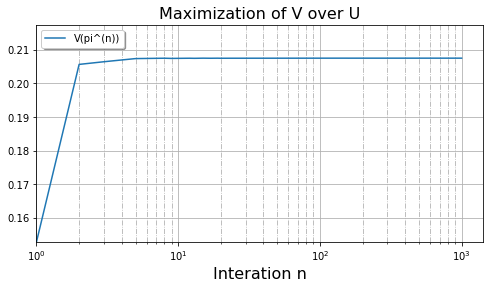

In [13]:
# PARAMETERS:
nbFoldsfitT = 4 #Number of iterations of the sub-cross-validation procedure on the training set for selecting the optimal number of centroids in order to achieve an acceptable generalization error.
T_max = 500 #Largest number of centroids to be tested at each fold of the sub-cross-validation procedure on the training set.
nbT = 10 #Number of number of centroids T to be tested at each fold of the sub-cross-validation procedure on the training set (a list containing nbT number of centroids will be generated between K and Tmax).
epsT = 0.007 #Maximum gap between the global risks of error of the training set and the generalization error.
N = 1000 #Number of iterations for the projected subgradient algorithm for computing piStar.
optionPlot = 1 #Allows to plot the convergence of the projected subgradient algorithm and the Fig. 2 on the paper regarding the choic of the optimal number of centroids.

# FIT BCDMC:
piStarBCDMC, pHatBCDMC, kmeansBCDMC, V_iterBCDMC, T_opt_BCDMC = fit_DMC(XTrain, YRTrain, K, L,'kmeans', [nbFoldsfitT, nbT, optionPlot, T_max], None, N, epsT, Box)

Least favorable priors $\pi^{\star}$:

Text(0.5, 1.0, 'Least favorable priors piStar')

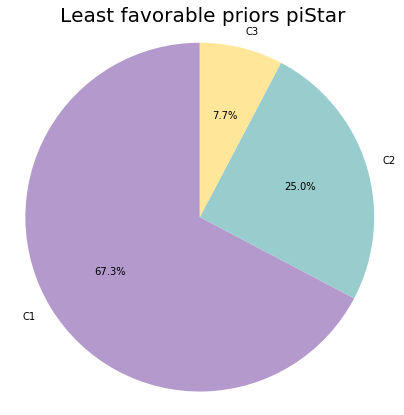

In [14]:
figScatter = plt.figure(figsize=(7,7))
# Pie plot of the class proportions associated with the training set:
ax2 = figScatter.add_subplot(1,1,1)
labels = ['C1', 'C2', 'C3']
colors = [(0.7, 0.6, 0.8),(0.6, 0.8, 0.8),(1, 0.9, 0.6)]
ax2.pie(piStarBCDMC[0], labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax2.axis('equal') 
ax2.set_title("Least favorable priors piStar", fontsize=20)

Evaluate the risks associated with the Discrete Box-Constrained Minimax Classifier on the training set:

In [15]:
YhatTrainBCDMC = predict_DMC(XTrain, K, L,'kmeans', kmeansBCDMC, pHatBCDMC, piStarBCDMC)
R_BCDMC_Train, confmatTrainDMC = compute_conditional_risk(YRTrain, YhatTrainBCDMC, K, L)
r_BCDMC_Train = compute_global_risk(R_BCDMC_Train, piTrain)
psi_Train_BCDMC = np.max(R_BCDMC_Train[0])-np.min(R_BCDMC_Train[0])

print('Global risk on the training set:', r_BCDMC_Train)
print('Class-conditional risk on the training set:', R_BCDMC_Train[0])
print('psi(delta_DMC):', psi_Train_BCDMC)

Global risk on the training set: 0.1823
Class-conditional risk on the training set: [0.14425 0.39    0.168  ]
psi(delta_DMC): 0.24575000000000002


Prediction of the class labels associated with the test instances using the Discrete Box-Constrained Minimax Classifier:

In [16]:
YhatTestBCDMC = predict_DMC(XTest, K, L,'kmeans', kmeansBCDMC, pHatBCDMC, piStarBCDMC)
R_BCDMC_Test, confmatTestBCDMC = compute_conditional_risk(YRTest, YhatTestBCDMC, K, L)
r_BCDMC_Test = compute_global_risk(R_BCDMC_Test, piTest)
psi_Test_BCDMC = np.max(R_BCDMC_Test[0])-np.min(R_BCDMC_Test[0])

print('Global risk on the test set:', r_BCDMC_Test)
print('Class-conditional risk on the test set:', R_BCDMC_Test[0])
print('psi(delta_DMC):', psi_Test_BCDMC)

Global risk on the test set: 0.1955
Class-conditional risk on the test set: [0.151875 0.44     0.16    ]
psi(delta_DMC): 0.28812499999999996


## Fit the Discrete Minimax Classifier (with supervised Tree discretization of the features)
In our paper [2] we explain how our approach is able to adjust Decision Trees for dealing with prior probability shifts. We can also use Decision Trees for discretizing the features when dealing with mixed attributes in order to apply our Box-Constained Minimax Classifier, which also leads to interesting results.

#### Fit the Discrete Minimax Classifier (without box-constraint on the priors)

Fit DMC ...
-> Search of the optimal depth:
---> Sub-cross-validation procedure: Processing fold f = 0
------> Processing depth = 3
------> Processing depth = 4
------> Processing depth = 5
------> Processing depth = 6
------> Processing depth = 7
------> Processing depth = 8
------> Processing depth = 9
------> Processing depth = 10
------> Processing depth = 15
------> Processing depth = 20
------> Processing depth = 30
------> Processing depth = 50
---> Sub-cross-validation procedure: Processing fold f = 1
------> Processing depth = 3
------> Processing depth = 4
------> Processing depth = 5
------> Processing depth = 6
------> Processing depth = 7
------> Processing depth = 8
------> Processing depth = 9
------> Processing depth = 10
------> Processing depth = 15
------> Processing depth = 20
------> Processing depth = 30
------> Processing depth = 50
---> Sub-cross-validation procedure: Processing fold f = 2
------> Processing depth = 3
------> Processing depth = 4
------> Process

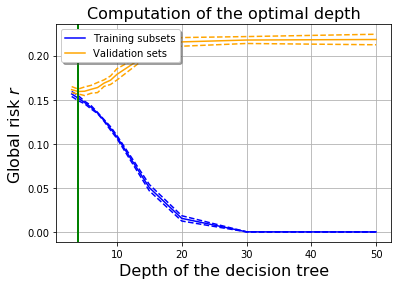

-> Optimal Depth (with respect to epsT) = 4
-> Compute the least favorable priors piStar


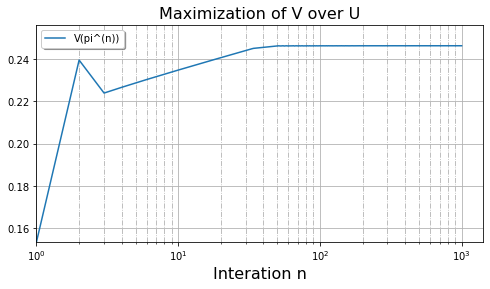

In [17]:
# PARAMETERS:
depth = [3,4,5,6,7,8,9,10,15,20,30,50] #List of maximal depth of the Decision Tree to be tested in order to achieve an acceptable generalization error.
nbFoldsfitT = 4 #Number of iterations of the sub-cross-validation procedure on the training set for selecting the optimal number of centroids in order to achieve an acceptable generalization error.
epsT = 0.01 #Maximum gap between the global risks of error of the training set and the generalization error.
N = 1000 #Number of iterations for the projected subgradient algorithm for computing piStar.
optionPlot = 1 #Allows to plot the convergence of the projected subgradient algorithm and the Fig. 2 on the paper regarding the choic of the optimal number of centroids.

# FIT DMC:
piBarDMC, pHatDMC, discretization_DT_DMC, V_iterDMC, T_opt_DMC = fit_DMC(XTrain, YRTrain, K, L,'DT', None, [depth, nbFoldsfitT, optionPlot], N, epsT, 'none')

Least favorable priors $\bar{\pi}$:

Text(0.5, 1.0, 'Least favorable priors piBar')

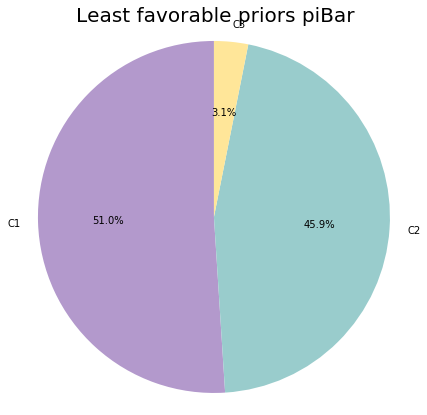

In [18]:
figScatter = plt.figure(figsize=(7,7))
# Pie plot of the class proportions associated with the training set:
ax2 = figScatter.add_subplot(1,1,1)
labels = ['C1', 'C2', 'C3']
colors = [(0.7, 0.6, 0.8),(0.6, 0.8, 0.8),(1, 0.9, 0.6)]
ax2.pie(piBarDMC[0], labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax2.axis('equal') 
ax2.set_title("Least favorable priors piBar",fontsize=20)

Evaluate the risks associated with the Discrete Minimax Classifier on the training set:

In [19]:
YhatTrainDMC = predict_DMC(XTrain, K, L,'DT', discretization_DT_DMC, pHatDMC, piBarDMC)
R_DMC_Train, confmatTrainDMC = compute_conditional_risk(YRTrain, YhatTrainDMC, K, L)
r_DMC_Train = compute_global_risk(R_DMC_Train, piTrain)
psi_Train_DMC = np.max(R_DMC_Train[0])-np.min(R_DMC_Train[0])

print('Global risk on the training set:', r_DMC_Train)
print('Class-conditional risk on the training set:', R_DMC_Train[0])
print('psi(delta_DMC):', psi_Train_DMC)

Global risk on the training set: 0.2467
Class-conditional risk on the training set: [0.251      0.24533333 0.182     ]
psi(delta_DMC): 0.069


Prediction of the class labels associated with the test instances using the Discrete Minimax Classifier:

In [20]:
YhatTestDMC = predict_DMC(XTest, K, L,'DT', discretization_DT_DMC, pHatDMC, piBarDMC)
R_DMC_Test, confmatTestDMC = compute_conditional_risk(YRTest, YhatTestDMC, K, L)
r_DMC_Test = compute_global_risk(R_DMC_Test, piTest)
psi_Test_DMC = np.max(R_DMC_Test[0])-np.min(R_DMC_Test[0])

print('Global risk on the test set:', r_DMC_Test)
print('Class-conditional risk on the test set:', R_DMC_Test[0])
print('psi(delta_DMC):', psi_Test_DMC)

Global risk on the test set: 0.2515
Class-conditional risk on the test set: [0.248125   0.30333333 0.15      ]
psi(delta_DMC): 0.15333333333333335


#### Fit the Discrete Box-Constrained Minimax Classifier (with box-constraint on the priors)

Generation of the box-constraint: Each row is associated with the constraints on each class. The first column represents the lower bound, the second column represents the upper bound. For this experiment, we consider the box-constraint
$$\mathbb{B} := \{\pi\in \mathbb{R}^3 : 0.6 \leq \pi_1 \leq 1, \;  0.1 \leq \pi_2 \leq 0.25, \; 0 \leq \pi_3 \leq 0.1\}.$$

In [21]:
Box = np.zeros((K,2))
# Class 1:
Box[0][0] = 0.6
Box[0][1] = 1
# Class 2:
Box[1][0] = 0.1
Box[1][1] = 0.25
# Class 3:
Box[2][0] = 0
Box[2][1] = 0.11

Compute the least favorable priors $\pi^{\star}$:

Fit DMC ...
-> Search of the optimal depth:
---> Sub-cross-validation procedure: Processing fold f = 0
------> Processing depth = 3
------> Processing depth = 4
------> Processing depth = 5
------> Processing depth = 6
------> Processing depth = 7
------> Processing depth = 8
------> Processing depth = 9
------> Processing depth = 10
------> Processing depth = 15
------> Processing depth = 20
------> Processing depth = 30
------> Processing depth = 50
---> Sub-cross-validation procedure: Processing fold f = 1
------> Processing depth = 3
------> Processing depth = 4
------> Processing depth = 5
------> Processing depth = 6
------> Processing depth = 7
------> Processing depth = 8
------> Processing depth = 9
------> Processing depth = 10
------> Processing depth = 15
------> Processing depth = 20
------> Processing depth = 30
------> Processing depth = 50
---> Sub-cross-validation procedure: Processing fold f = 2
------> Processing depth = 3
------> Processing depth = 4
------> Process

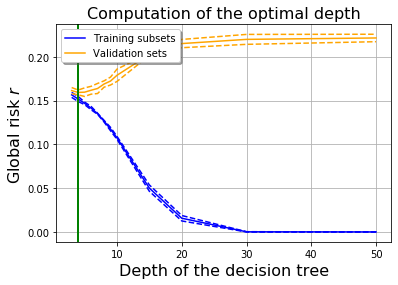

-> Optimal Depth (with respect to epsT) = 4
-> Compute the least favorable priors piStar


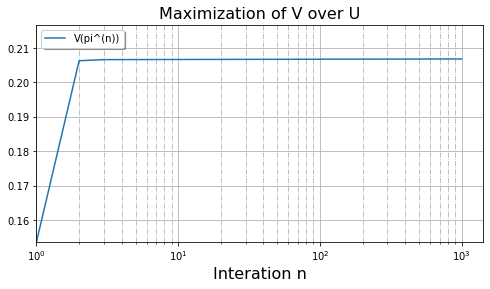

In [22]:
# PARAMETERS:
depth = [3,4,5,6,7,8,9,10,15,20,30,50] # List of maximal depth of the Decision Tree to be tested in order to achieve an acceptable generalization error.
nbFoldsfitT = 4 #Number of iterations of the sub-cross-validation procedure on the training set for selecting the optimal number of centroids in order to achieve an acceptable generalization error.
epsT = 0.01 #Maximum gap between the global risks of error of the training set and the generalization error.
N = 1000 #Number of iterations for the projected subgradient algorithm for computing piStar.
optionPlot = 1 #Allows to plot the convergence of the projected subgradient algorithm and the Fig. 2 on the paper regarding the choic of the optimal number of centroids.

# FIT DMC:
piStarBCDMC, pHatBCDMC, discretization_DT_BCDMC, V_iterBCDMC, T_opt_BCDMC = fit_DMC(XTrain, YRTrain, K, L,'DT', None, [depth, nbFoldsfitT, optionPlot], N, epsT, Box)

Least favorable priors $\pi^{\star}$:

Text(0.5, 1.0, 'Least favorable priors piStar')

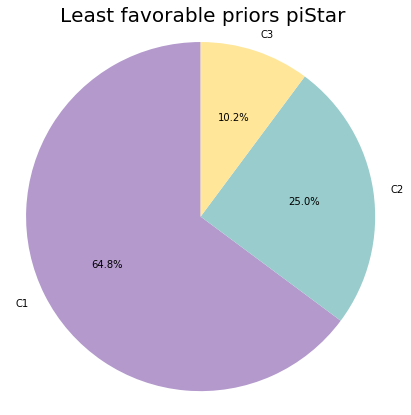

In [23]:
figScatter = plt.figure(figsize=(7,7))
# Pie plot of the class proportions associated with the training set:
ax2 = figScatter.add_subplot(1,1,1)
labels = ['C1', 'C2', 'C3']
colors = [(0.7, 0.6, 0.8),(0.6, 0.8, 0.8),(1, 0.9, 0.6)]
ax2.pie(piStarBCDMC[0], labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax2.axis('equal') 
ax2.set_title("Least favorable priors piStar", fontsize=20)

Evaluate the risks associated with the Discrete Box-Constrained Minimax Classifier on the training set:

In [24]:
YhatTrainBCDMC = predict_DMC(XTrain, K, L,'DT', discretization_DT_BCDMC, pHatBCDMC, piStarBCDMC)
R_BCDMC_Train, confmatTrainBCDMC = compute_conditional_risk(YRTrain, YhatTrainBCDMC, K, L)
r_BCDMC_Train = compute_global_risk(R_BCDMC_Train, piTrain)
psi_Train_BCDMC = np.max(R_BCDMC_Train[0])-np.min(R_BCDMC_Train[0])

print('Global risk on the training set:', r_BCDMC_Train)
print('Class-conditional risk on the training set:', R_BCDMC_Train[0])
print('psi(delta_BCDMC):', psi_Train_BCDMC)

Global risk on the training set: 0.1768
Class-conditional risk on the training set: [0.132 0.428 0.14 ]
psi(delta_BCDMC): 0.296


Prediction of the class labels associated with the test instances using the Discrete Box-Constrained Minimax Classifier:

In [25]:
YhatTestBCDMC = predict_DMC(XTest, K, L,'DT', discretization_DT_BCDMC, pHatBCDMC, piStarBCDMC)
R_BCDMC_Test, confmatTestBCDMC = compute_conditional_risk(YRTest, YhatTestBCDMC, K, L)
r_BCDMC_Test = compute_global_risk(R_BCDMC_Test, piTest)
psi_Test_BCDMC = np.max(R_BCDMC_Test[0])-np.min(R_BCDMC_Test[0])

print('Global risk on the test set:', r_BCDMC_Test)
print('Class-conditional risk on the test set:', R_BCDMC_Test[0])
print('psi(delta_BCDMC):', psi_Test_BCDMC)

Global risk on the test set: 0.189
Class-conditional risk on the test set: [0.138125 0.48     0.13    ]
psi(delta_BCDMC): 0.35


## Toy example on a synthetic database with K=2 classes
For the following experiment with $K=2$ classes, we can plot the function V as presented in Figure 1 in paper [1].

In [26]:
K = 2
L = np.ones((K,K)) - np.eye(K)

In [27]:
X, y = datasets.make_blobs(n_samples=[8000,1500], n_features=2, centers=[(9.5, 10), (11, 12)], cluster_std=[[1,1.5], [1.1,1.2]], shuffle=True, random_state=None)

X1 = []
X2 = []
for i in range(len(X)):
    X1.append(X[i][0])
    X2.append(X[i][1])

df = pd.DataFrame({'X1':X1, 'X2':X2, 'y':y+1})

# 
XTrain = df.copy()
XTrain.drop(['y'], axis='columns', inplace=True)
YRTrain = df[['y']]

# Class proportions of the training set:
piTrain = compute_pi(K, YRTrain)

Scatter plot of the training dataset and pie plot of the class proportions:

Text(0.5, 1.0, 'Class proportions of the Training set')

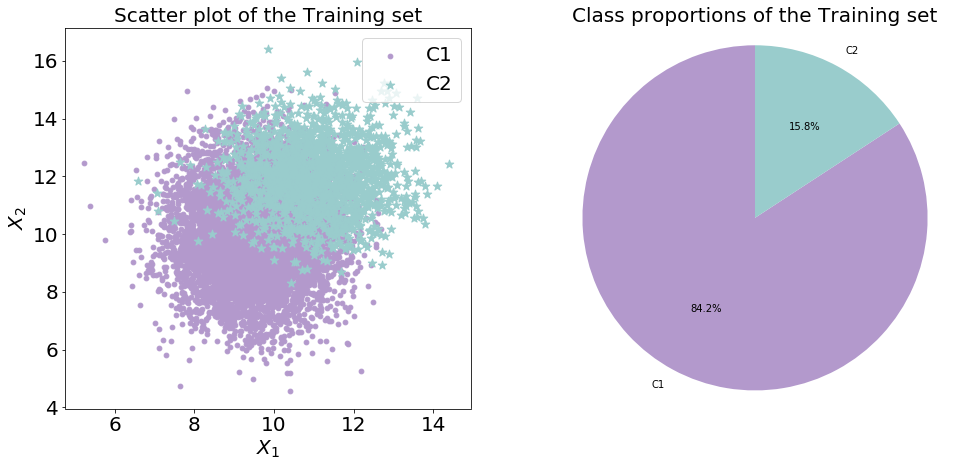

In [28]:
figScatter = plt.figure(figsize=(16,7))

# Scatter plot of the training set:
ax1 = figScatter.add_subplot(1,2,1)
ax1.scatter(XTrain.loc[(np.where(YRTrain[['y']]==1)[0]).tolist(),'X1'], XTrain.loc[(np.where(YRTrain[['y']]==1)[0]).tolist(),'X2'], color=(0.7, 0.6, 0.8), marker='.', label='C1',s=90)
ax1.scatter(XTrain.loc[(np.where(YRTrain[['y']]==2)[0]).tolist(),'X1'], XTrain.loc[(np.where(YRTrain[['y']]==2)[0]).tolist(),'X2'], color=(0.6, 0.8, 0.8), marker='*', label='C2',s=80)
ax1.legend(fontsize=20, loc='upper right')
ax1.set_xlabel("$X_1$",fontsize=20)
ax1.set_ylabel("$X_2$",fontsize=20)
ax1.set_title("Scatter plot of the Training set",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# Pie plot of the class proportions associated with the training set:
ax2 = figScatter.add_subplot(1,2,2)
labels = ['C1', 'C2']
colors = [(0.7, 0.6, 0.8),(0.6, 0.8, 0.8)]
ax2.pie(piTrain[0], labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax2.axis('equal') 
ax2.set_title("Class proportions of the Training set",fontsize=20)

Fit the Discrete Minimax classifier on the Training set:

Fit DMC ...
-> Fit the number of centroids:
---> Sub-cross-validation procedure: Processing fold f = 0
------> Processing number of centroids T = 2
------> Processing number of centroids T = 4
------> Processing number of centroids T = 7
------> Processing number of centroids T = 13
------> Processing number of centroids T = 23
------> Processing number of centroids T = 43
------> Processing number of centroids T = 79
------> Processing number of centroids T = 147
------> Processing number of centroids T = 271
------> Processing number of centroids T = 500
---> Sub-cross-validation procedure: Processing fold f = 1
------> Processing number of centroids T = 2
------> Processing number of centroids T = 4
------> Processing number of centroids T = 7
------> Processing number of centroids T = 13
------> Processing number of centroids T = 23
------> Processing number of centroids T = 43
------> Processing number of centroids T = 79
------> Processing number of centroids T = 147
------> Proc

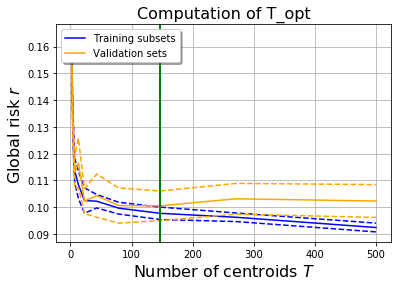

-> Optimal number of centroids T_opt (with respect to epsT) = 147.0
-> Compute the least favorable priors piStar


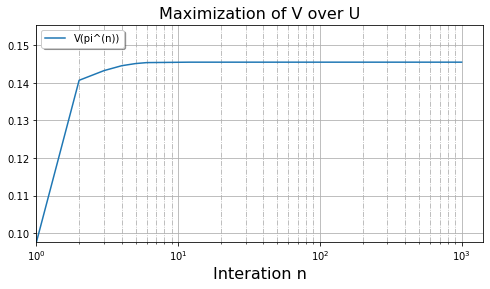

In [29]:
# PARAMETERS:
nbFoldsfitT = 4 #Number of iterations of the sub-cross-validation procedure on the training set for selecting the optimal number of centroids in order to achieve an acceptable generalization error.
T_max = 500 #Largest number of centroids to be tested at each fold of the sub-cross-validation procedure on the training set.
nbT = 10 #Number of number of centroids T to be tested at each fold of the sub-cross-validation procedure on the training set (a list containing nbT number of centroids will be generated between K and Tmax).
epsT = 0.007 #Maximum gap between the global risks of error of the training set and the generalization error.
N = 1000 #Number of iterations for the projected subgradient algorithm for computing piStar.
optionPlot = 1 #Allows to plot the convergence of the projected subgradient algorithm and the Fig. 2 on the paper regarding the choic of the optimal number of centroids.

# FIT DMC:
piBarDMC, pHatDMC, kmeansDMC, V_iterDMC, T_opt_DMC = fit_DMC(XTrain, YRTrain, K, L,'kmeans', [nbFoldsfitT, nbT, optionPlot, T_max], None, N, epsT, 'none')

Least favorable priors $\bar{\pi}$:

Text(0.5, 1.0, 'Least favorable priors piBar')

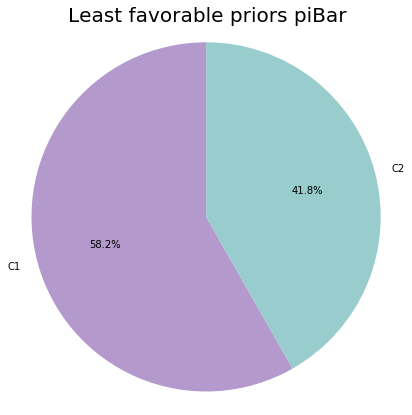

In [30]:
figScatter = plt.figure(figsize=(7,7))
# Pie plot of the class proportions associated with the training set:
ax2 = figScatter.add_subplot(1,1,1)
labels = ['C1', 'C2']
colors = [(0.7, 0.6, 0.8),(0.6, 0.8, 0.8)]
ax2.pie(piBarDMC[0], labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax2.axis('equal') 
ax2.set_title("Least favorable priors piBar",fontsize=20)

Plot the function $V$ over The simplex $\mathbb{S}$:

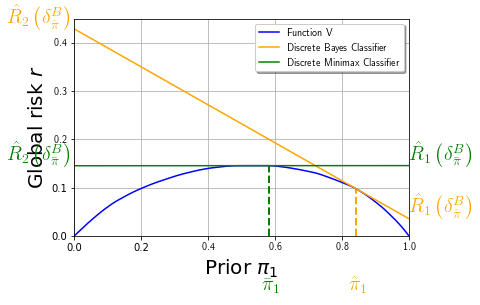

In [31]:
rHat, rBar = plot2D_V_piTrain_piBar(pHatDMC, K, L, T_opt_DMC, piTrain, piBarDMC)